# Praca domowa 6 - Ada Gąssowska


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture

W 6 pracy domowej porównanie działanie dwóch algorytmów klasteryzacji : KMeans oraz GaussianMixture. Liczby klastrów zostaną wybrane za pomocą wykresu Silhouette oraz Davies Bouldin Score. Dodatkowo oprócz tych dwóch metryk końcowe modele zostaną porównane przy pomocy indeksu Calińskiego-Harabasza. 

### Opis metryk 

**Silhouette Score** - miara którą wylicza się w nastepujący sposób: dla każdej obserwacji wyliczamy współczynnik silhouette jako $s = \frac{b-a}{max(a,b)}$, gdzie a oznacza średnią odległość danej obserwacji od wszystkich innych obserwacji w grupie,a b średnią odległość danej obserwacji od wszystkich innych obserwacji w innej najbliższej grupie. Następnie bierzemy średnią ze wszystkich współczynników silhouette. Im wartość ta jest wyższa, tym lepszy jest nasz algorytm.

**Davies-Bouldin Score** - miara ta to średnie podobieństwo klastra, z klastrem najbardziej do niego podobnym. Podobieństwo wyznaczane jest jako stosunek odległości wewnątrz klastra do odległości między klastrami. Co za tym idzie, jeśli klastry są między sobą odległe i mało rozproszone, dostaniemy niższy (lepszy) wynik.

**Calinski-Harabasz Score** - miara ta definiowana jest jako stosunek rozproszenia w klastrze, do rozproszenia między klastrami. Im wyższy wynik tym lepszy jest nasz model.

## Wstępna analiza danych

In [124]:
data = pd.read_csv("C:/Users/Ada/Desktop/clustering_R3.csv")

In [125]:
data.head(10)

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814
5,142.410820,208.958082,3.383849
6,150.612020,201.265581,1.171160
7,146.857036,205.544996,2.621157
8,151.393323,202.981200,1.015493
9,153.938260,202.139725,2.696769


In [126]:
data.describe()

,X1,X2,X3
count,1000.000000,1000.000000,1000.000000
mean,240.181036,154.937365,5.454947
std,115.556334,41.964161,4.793973
min,38.516347,87.376621,0.125057
25%,148.801776,104.853322,1.806255
50%,231.754437,151.846118,3.430892
75%,350.277958,198.367658,8.287805
max,399.930758,213.917568,24.537806


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
X1    1000 non-null float64
X2    1000 non-null float64
X3    1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB


Nie mamy braków, tylko dane numeryczne

### Wizualizacja 

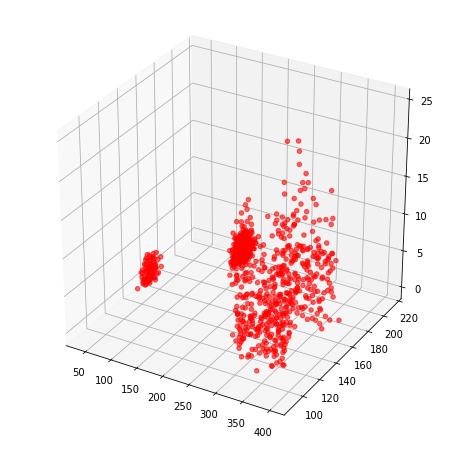

In [129]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.X1, data.X2, data.X3, color='red', alpha=0.6)

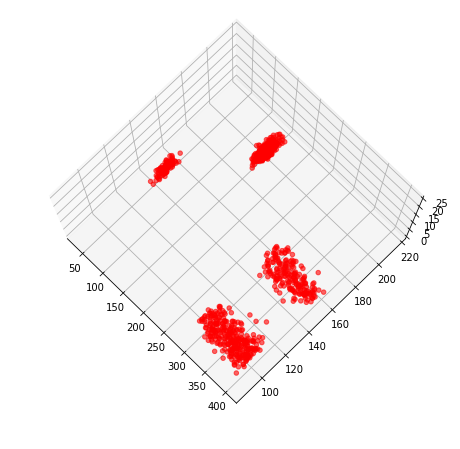

In [130]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(data.X1,data.X2,data.X3, color='red', alpha=0.6)
ax.view_init(80,-45)

Na oko wydaje się, że mamy cztery klastry

## Skalowanie danych

In [131]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=['X1','X2','X3'])

### Rysunek po przeskalowaniu

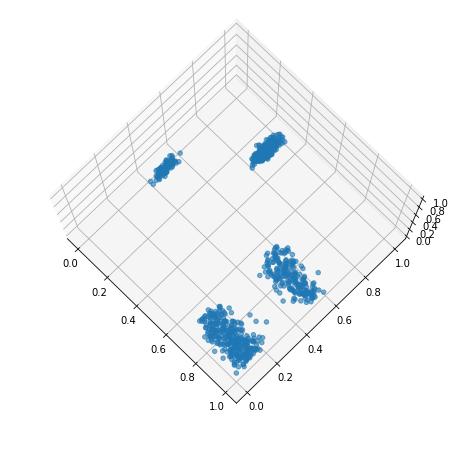

In [132]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(data.X1,data.X2,data.X3, alpha=0.6)
ax.view_init(80,-45)

Po przeskalowaniu dalej widoczne cztery klastry. 

## Modele

### KMeans

### Szukanie liczby klastrów - Davies Bouldin Score i Silhouette

In [133]:
def plot_DB_Sil_Scores(data, Model, k_max=20):
    DBScores = []
    SilhouetteScores=[]
    k_range=list(range(2,k_max+1))
    for i in k_range:
        if Model==KMeans:
            model = Model(n_clusters = i)
        if Model==GaussianMixture:
            model= Model(n_components=i)
        predictions = model.fit_predict(data)
        DBScores.append(davies_bouldin_score(data, predictions))
        SilhouetteScores.append(silhouette_score(data, predictions))
    fig, ax = plt.subplots()
    ax.plot(k_range, DBScores, color = 'red', linestyle='--', marker='o')
    ax.set_ylabel("Davies-Bouldin Score", color = 'red')
    ax.tick_params(axis = 'y', labelcolor = 'red')
    ax.set_xlabel("Number of clusters")
    ax2 = ax.twinx()
    ax2.plot(k_range, SilhouetteScores, color = 'blue', linestyle='--', marker='o')
    ax2.set_ylabel('Silhouette Score', color = 'blue')
    ax2.tick_params(axis = 'y', labelcolor = 'blue')
    plt.xticks(k_range)
    plt.title('Scores for different number of clusters for ' + Model.__name__)

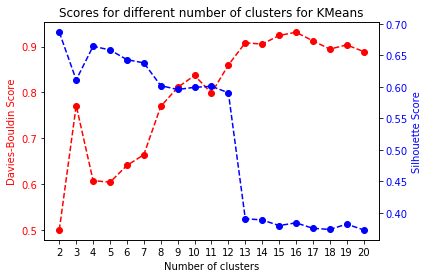

In [134]:
plot_DB_Sil_Scores(data, KMeans)

Jako, że chcemy osiągnąć jak największe silhouette score, a jak najmniejsze DBScore - najlepiej wypada model dla n_clusters=2. Dla n_clusters=4 wyniki też wydają się bardzo dobre - sprawdzimy zatem też dla takiego modelu.

#### KMeans dla liczby klastrów równej 2


In [135]:
model_Kmeans_2=KMeans(n_clusters=2)
kmeans_results_2 = model_Kmeans_2.fit_predict(data)

Text(0.5, 0.92, 'Podział dla KMeans dla liczby klastrów równej 2 (widok z boku)')

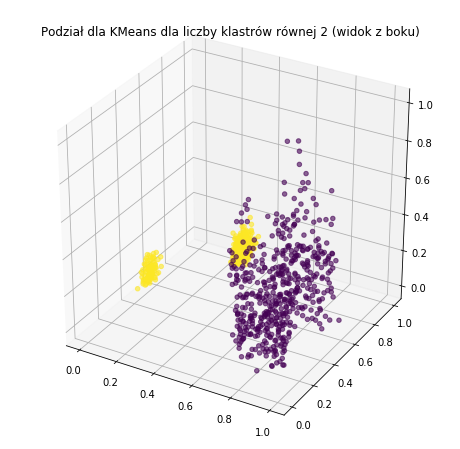

In [136]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.X1, data.X2, data.X3, c=kmeans_results_2, alpha=0.6)
plt.title("Podział dla KMeans dla liczby klastrów równej 2 (widok z boku)")

Text(0.5, 0.92, 'Podział dla KMeans dla liczby klastrów równej 2 (widok z góry)')

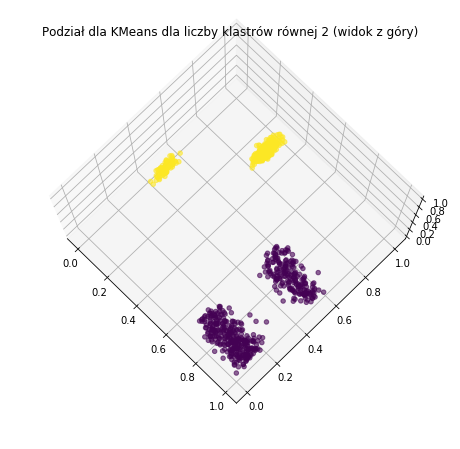

In [137]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(data.X1,data.X2,data.X3, alpha=0.6, c=kmeans_results_2)
ax.view_init(80,-45)
plt.title("Podział dla KMeans dla liczby klastrów równej 2 (widok z góry)")

#### KMeans dla liczby klastrów równej 4

In [138]:
model_Kmeans_4=KMeans(n_clusters=4)
kmeans_results_4 = model_Kmeans_4.fit_predict(data)

Text(0.5, 0.92, 'Podział dla KMeans dla liczby klastrów równej 4 (widok z boku)')

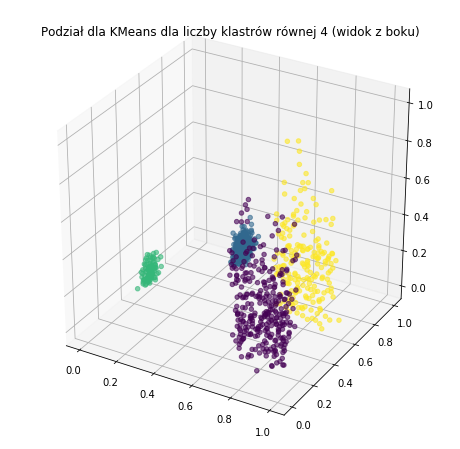

In [139]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.X1, data.X2, data.X3, c=kmeans_results_4, alpha=0.6)
plt.title("Podział dla KMeans dla liczby klastrów równej 4 (widok z boku)")

Text(0.5, 0.92, 'Podział dla KMeans dla liczby klastrów równej 4 (widok z góry)')

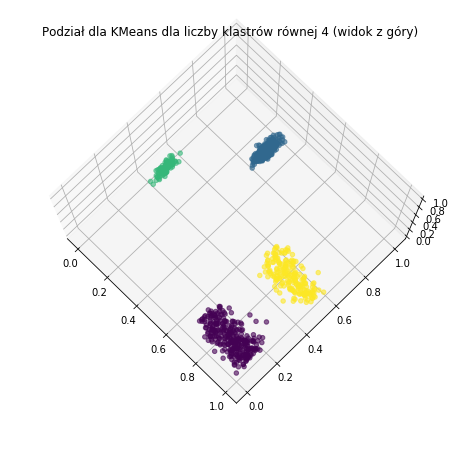

In [140]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(data.X1,data.X2,data.X3, alpha=0.6, c=kmeans_results_4)
ax.view_init(80,-45)
plt.title("Podział dla KMeans dla liczby klastrów równej 4 (widok z góry)")

Dla liczby klastrów równej cztery algorytm podzielił zbiór zgodnie z moimi przypuszczeniami. Podział na dwa również wydaje się być sensowny. 

### Gaussian Mixture

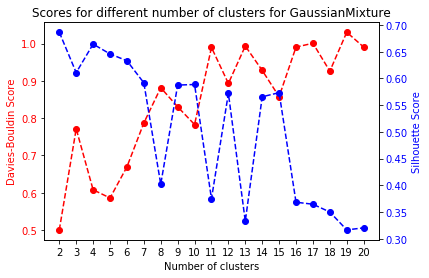

In [142]:
plot_DB_Sil_Scores(data, GaussianMixture)

Również dla modelu GaussianMixture najlepsze wyniki uzyskał model dla 2 klastrów. Podział na 4 i 5 klastrów wypadły porównywalnie dobrze: podział na 4 ma trochę wyższy Silhouette Score, natomiast podział na 5 uzyskał trochę niższy DB Score. Aby porównać z poprzednim modelem sprawdzę podział dla 2 i 4 klastrów.
    

#### GaussianMixture dla dwóch klastrów

In [143]:
model_Gauss_2=GaussianMixture(n_components=2)
Gauss_results_2 = model_Gauss_2.fit_predict(data)

Text(0.5, 0.92, 'Podział dla GaussianMixture dla liczby klastrów równej 2 (widok z boku)')

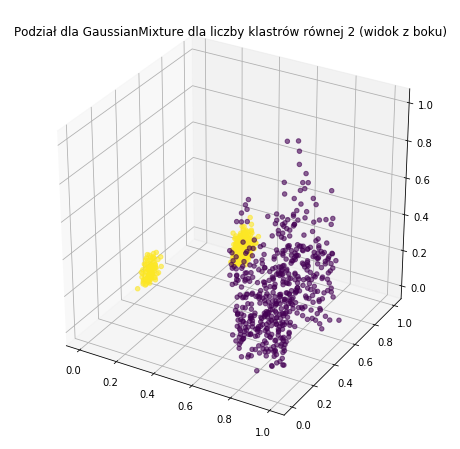

In [144]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.X1, data.X2, data.X3, c=Gauss_results_2, alpha=0.6)
plt.title("Podział dla GaussianMixture dla liczby klastrów równej 2 (widok z boku)")

Text(0.5, 0.92, 'Podział dla GaussianMixture dla liczby klastrów równej 2 (widok z góry)')

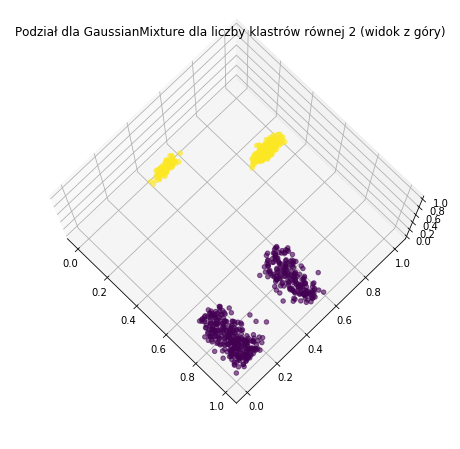

In [145]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(data.X1,data.X2,data.X3, alpha=0.6, c=Gauss_results_2)
ax.view_init(80,-45)
plt.title("Podział dla GaussianMixture dla liczby klastrów równej 2 (widok z góry)")

#### Gaussian Mixture dla czterech klastrów

In [146]:
model_Gauss_4=GaussianMixture(n_components=4)
Gauss_results_4 = model_Gauss_4.fit_predict(data)

Text(0.5, 0.92, 'Podział dla GaussianMixture dla liczby klastrów równej 4 (widok z boku)')

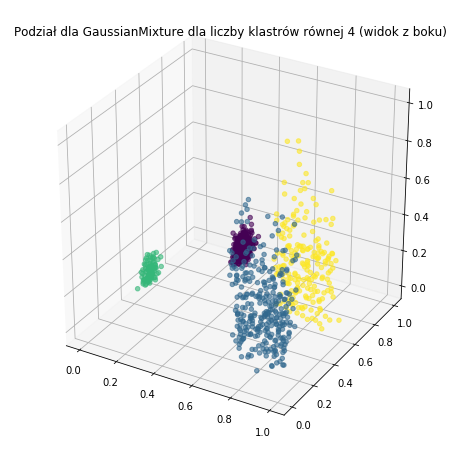

In [147]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.X1, data.X2, data.X3, c=Gauss_results_4, alpha=0.6)
plt.title("Podział dla GaussianMixture dla liczby klastrów równej 4 (widok z boku)")

Text(0.5, 0.92, 'Podział dla GaussianMixture dla liczby klastrów równej 4 (widok z góry)')

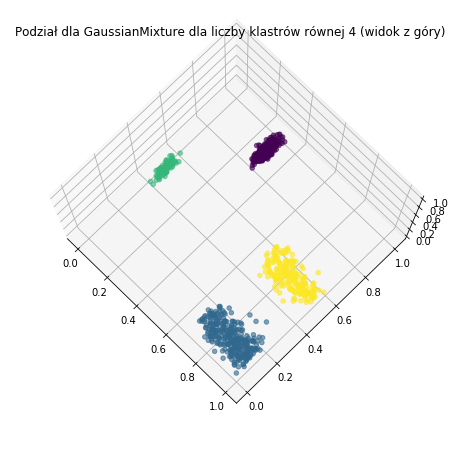

In [148]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(data.X1,data.X2,data.X3, alpha=0.6, c=Gauss_results_4)
ax.view_init(80,-45)
plt.title("Podział dla GaussianMixture dla liczby klastrów równej 4 (widok z góry)")

Podziały wydają się bardzo podobne (dopasowują klastry zgodnie z intuicją) , aby lepiej porównać modele skorzystamy z metryk.

## Porównanie modeli


In [155]:
scores = {'KMeans n_clusters=2':[silhouette_score(data,kmeans_results_2), davies_bouldin_score(data, kmeans_results_2), calinski_harabasz_score(data, kmeans_results_2)],
          'KMeans n_clusters=4':[silhouette_score(data,kmeans_results_4), davies_bouldin_score(data, kmeans_results_4), calinski_harabasz_score(data, kmeans_results_4)],
          'GaussianMixture n_components=2':[silhouette_score(data,Gauss_results_2), davies_bouldin_score(data, Gauss_results_2), calinski_harabasz_score(data, Gauss_results_2)],
          'GaussianMixture n_components=4':[silhouette_score(data,Gauss_results_4), davies_bouldin_score(data, Gauss_results_4), calinski_harabasz_score(data, Gauss_results_4)]}

In [156]:
scores = pd.DataFrame(scores)
scores.index=['Silhouette', 'DB', "CH"]

In [157]:
scores

,KMeans n_clusters=2,KMeans n_clusters=4,GaussianMixture n_components=2,GaussianMixture n_components=4
Silhouette,0.686559,0.664364,0.686559,0.664364
DB,0.500162,0.607814,0.500162,0.607814
CH,3114.954510,3269.023133,3114.954510,3269.023133


Okazało się, że modele KMeans i GaussianMixture dla takiej samej liczby klastrów podzieliły zbiór dokładnie tak samo (o czym świadczą identyczne wszystkie wyniki). Można natomiast zauważyć, że o ile podział na dwa klastry generuje lepsze wyniki metryk Silohuette i Davies-Bouldin , to podział na cztery klastry odznacza się lepszą wartością metryki Calinski-Harabasz. Stąd  ciężko stwierdzić, który model oraz podział na klastry okazał się być najlepszy.